# Sale Price Study Notebook

## Objectives

Answer the client's first business requirement of being able to visualise which features of a property correlate most strongly to the sale price by: <br>
 - Analysing correlation and PPS scores.
 - Conducting further exploratory data analysis using ProfileReport and other tools.
 - Visualising findings in plots that can be later used in a Streamlit app.

## Inputs

* /inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv

## Outputs

* Generate plots that can be used later in a Streamlit app.

## Additional Comments

* We will apply the method used in https://github.com/Code-Institute-Solutions/churnometer/blob/main/jupyter_notebooks/02%20-%20Churned%20Customer%20Study.ipynb and adapting it to the scope and requirements of this project.

## Notebook in Relation to CRISP-DM

* This notebook forms the Data Understanding phase of the CRISP-DM framework.


---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/CI-PP5-Peter-Regan-Heritage-Housing-Project/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory.

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/CI-PP5-Peter-Regan-Heritage-Housing-Project'

# 

## Import Libraries

In [4]:
import pandas as pd
from ydata_profiling import ProfileReport
from feature_engine.encoding import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import ppscore as pps

# Data Exploration

## Load Cleaned Data

In [5]:
df = (pd.read_csv("/workspaces/CI-PP5-Peter-Regan-Heritage-Housing-Project/outputs/datasets/cleaned/HousePricesCleaned.csv"))
df.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


## Generate a Profile Report to Recap Data Types and General Insights

In [6]:
ydata_report = ProfileReport(df=df, minimal=True)
ydata_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation Analysis

Let's examine both the Spearman and Pearson coefficients. The functions used to conduct this analysis are taken from Code Institute's "Churnometer" walkthrough project.

First, as Spearman and Pearson tests deal only with numerical values, we will use OneHotEncoder to encode categorical variables as corresponding numerical values.

In [7]:
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_encoded = encoder.fit_transform(df)
print(df_encoded.shape)
df_encoded.head(3)

(1460, 38)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,...,BsmtFinType1_BLQ,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_None,GarageFinish_Fin,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.0,706,150,548,2003.0,1710,8450,65.0,...,0,0,1,0,0,0,1,0,0,0
1,1262,0.0,3.0,978,284,460,1976.0,1262,9600,80.0,...,0,0,1,0,0,0,0,1,0,0
2,920,866.0,3.0,486,434,608,2001.0,1786,11250,68.0,...,0,0,1,0,0,0,1,0,0,0


Then we will visualise the correlations:

In [8]:
def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)
  

In [9]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df_encoded)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

          count   mean    std  min  25%  50%  75%    max
ppscore  1406.0  0.019  0.071  0.0  0.0  0.0  0.0  0.945




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



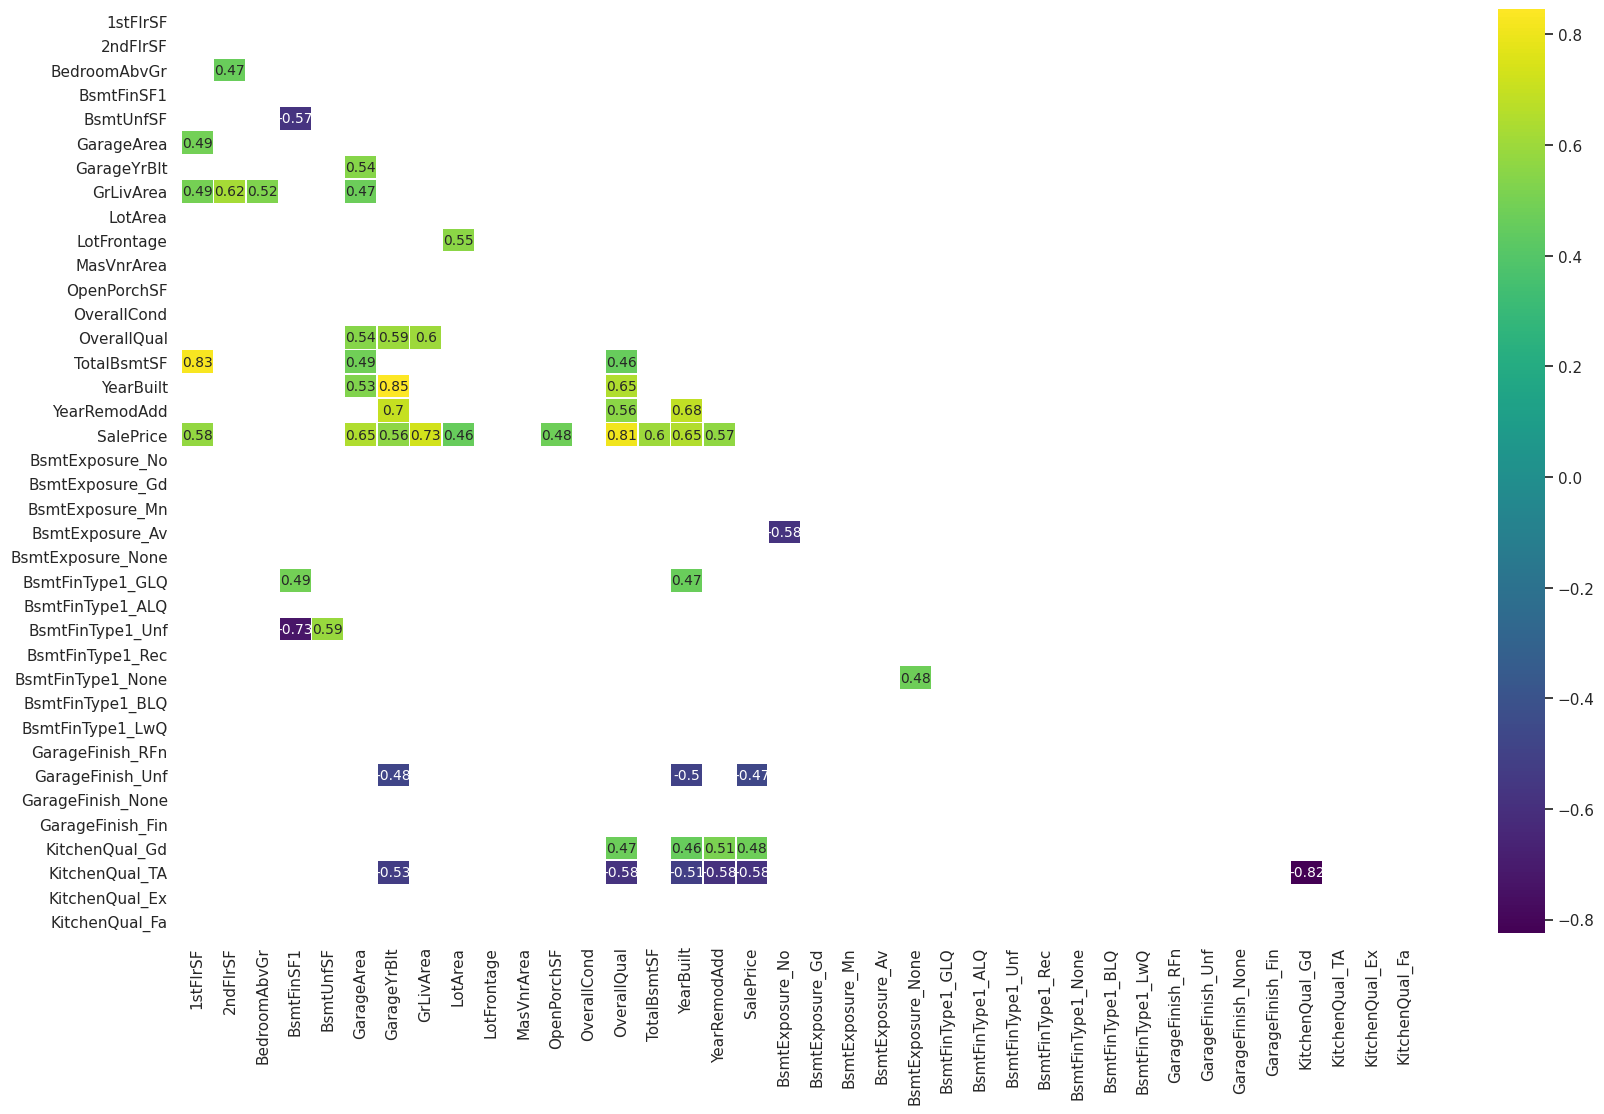



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



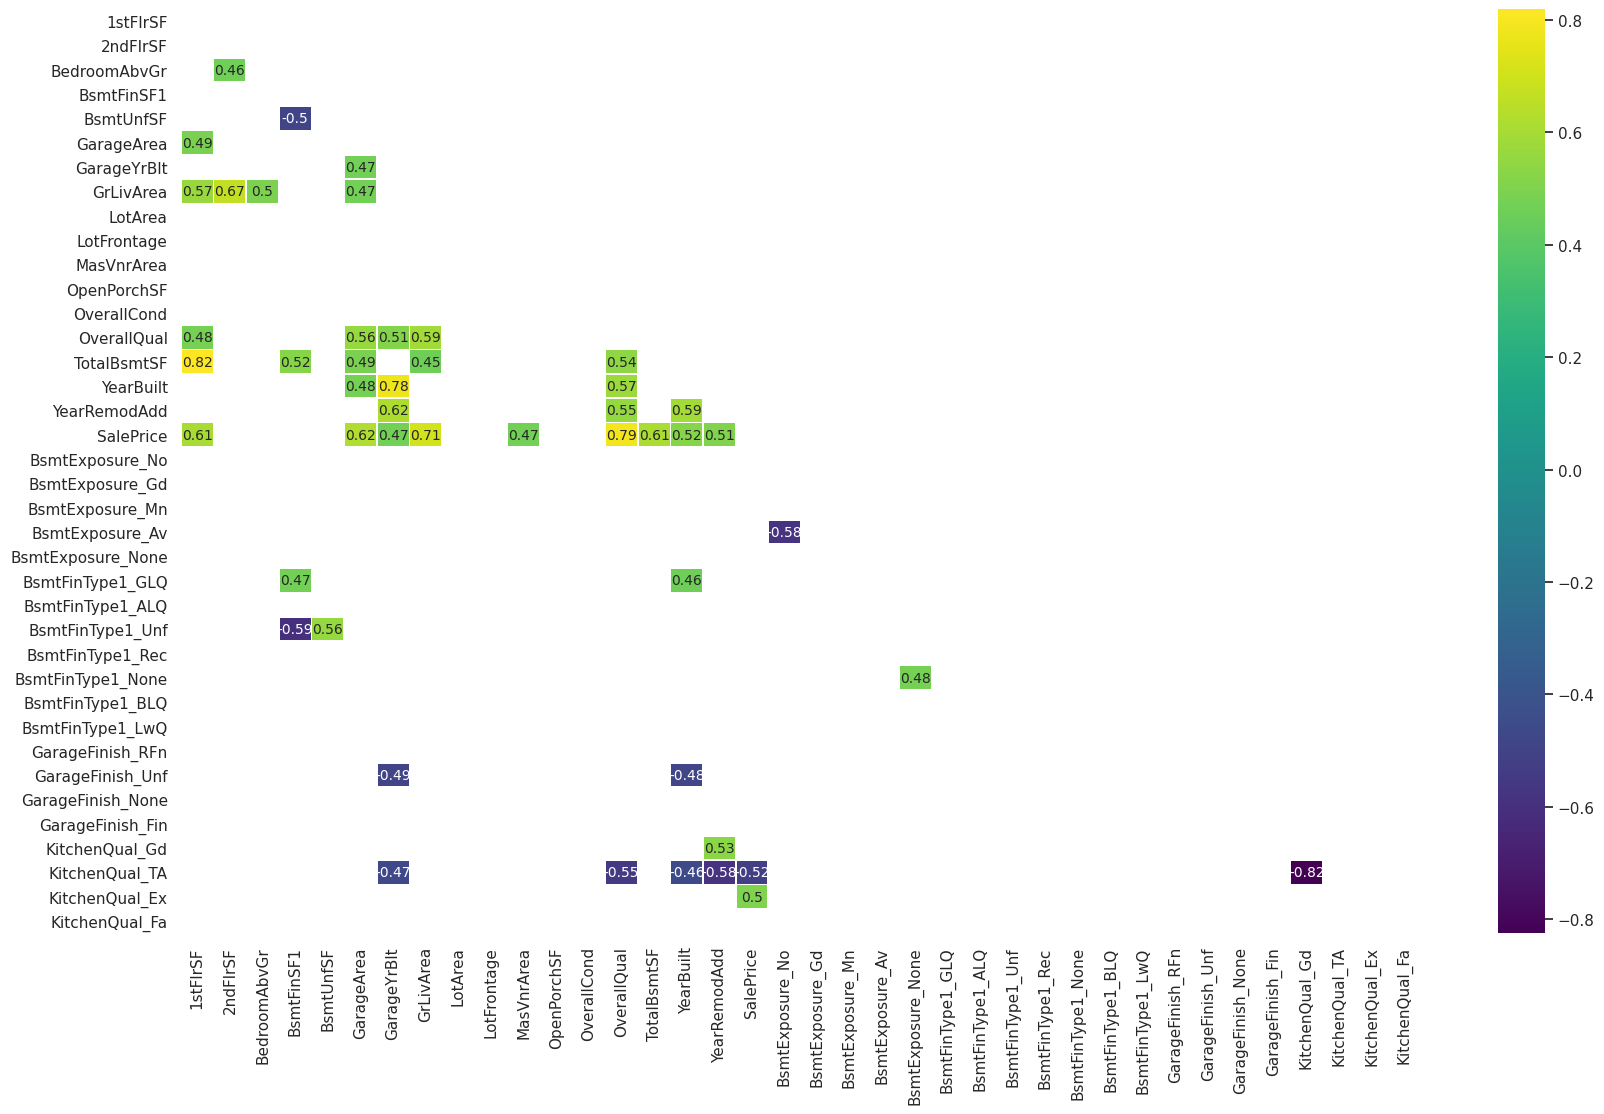



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



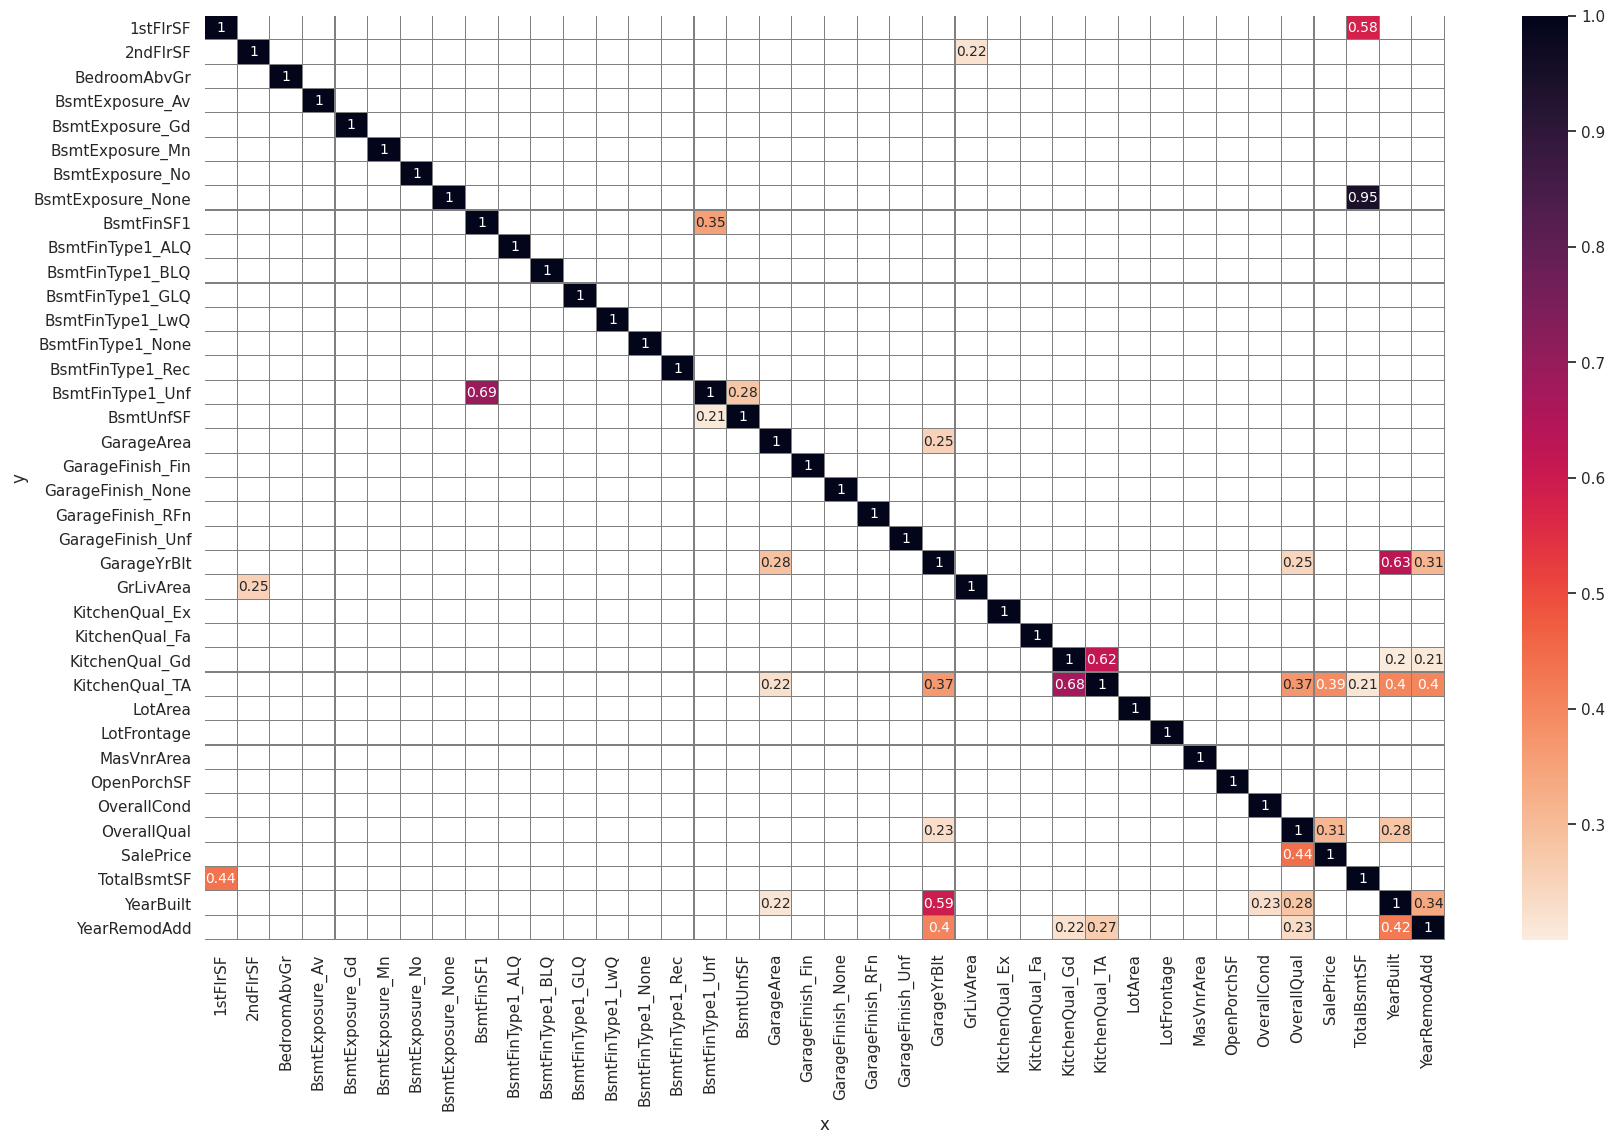

In [10]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman,
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.45, PPS_Threshold = 0.1,
                  figsize=(20,12), font_annot=10)

Then, let's list the most strongly correlated variables ordered by strength of the correlation. We will look at the Spearman and Pearson coefficients specifically as they relate to sale price, our target variable. Note that we begin at position 1 in the list of variables for comparison so that SalePrice is omitted. 

In [ ]:
corr_spearman = df_encoded.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

In [ ]:
corr_pearson = df_encoded.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

Now we will look at the top ten variables most strongly correlated to sale price from the series of variables with the highest spearman correlation scores and from the series of variables with the highest pearson correlation scores.

Then we will merge these two series and use the 'set' method to avoid duplicating variables in the resulting list.

In [ ]:
top_ten_correlated_values = 10
set(corr_pearson[:top_ten_correlated_values].index.to_list() + corr_spearman[:top_ten_correlated_values].index.to_list())

As we can see this results in a list with 12 variables. We will define this list and use it as our list of variables to study that have the greatest impact on the sale price.

In [ ]:
strong_correlation_vars = ['1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'MasVnrArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'] 
strong_correlation_vars

## PPS Study

After having experimented with some different thresholds before settling on the one provided in this notebook for the above visualisation, we can see that variables with a PPS of 0.15 or above tend to have a high predictive power. Here we will identify these variables with the highest predictive power and plot them in a bar plot.

In [ ]:
# pps_saleprice = pps_matrix.iloc["SalePrice"]
pps_topscores = pps_matrix.iloc[19].sort_values(key=abs, ascending=False)[1:6]
plt.bar(x=pps_topscores.index, height=pps_topscores)
plt.xticks(rotation=90)
plt.title("Predictive Power Score", fontsize=20, y=1.05)
plt.show()

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
